In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [10]:
df = pd.read_csv("https://github.com/krishnaik06/playstore-Dataset/raw/refs/heads/main/googleplaystore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [11]:
df.shape

(10841, 13)

In [12]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [14]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [15]:
df.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up


In [17]:
df.Reviews.str.isnumeric().sum()

10840

In [32]:
df[~df.Reviews.str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [30]:
df_copy = df.copy()

In [31]:
df_copy.drop(index=10472, inplace=True)

In [34]:
df_copy.Reviews = df_copy.Reviews.astype(int)

In [42]:
df_copy.Size = df_copy.Size.str.replace('M', '000')
df_copy.Size = df_copy.Size.str.replace('k', '')
df_copy.Size = df_copy.Size.replace('Varies with device', np.nan)

In [43]:
df_copy.Size = df_copy.Size.astype(float)

In [46]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.2+ MB


In [50]:
df_copy.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up


In [51]:
characters_to_remove = ['+', ',', '$']
columns_to_clean = ['Installs', 'Price']
for item in characters_to_remove:
    for column in columns_to_clean:
        df_copy[column] = df_copy[column].str.replace(item, '')

In [52]:
df_copy['Installs'] = df_copy['Installs'].astype(int)
df_copy['Price'] = df_copy['Price'].astype(float)

In [53]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.2+ MB


In [55]:
df_copy.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up


In [64]:
df_copy['Last Updated'] = pd.to_datetime(df_copy['Last Updated'])
df_copy['Day'] = df_copy['Last Updated'].dt.day
df_copy['Month'] = df_copy['Last Updated'].dt.month
df_copy['Year'] = df_copy['Last Updated'].dt.year

In [65]:
df_copy.to_csv('Google_Cleaned.csv')

## EDA

In [66]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


In [70]:
df_copy[df_copy.duplicated('App')].shape

(1181, 16)

In [72]:
df_copy = df_copy.drop_duplicates(subset=['App'], keep='first')

In [73]:
df_copy.shape

(9659, 16)

### Explore Data

In [76]:
numerical_features = [col for col in df_copy.columns if df_copy[col].dtype != 'O']
categorical_features = [col for col in df_copy.columns if df_copy[col].dtype == 'O']
numerical_features, categorical_features

(['Rating',
  'Reviews',
  'Size',
  'Installs',
  'Price',
  'Last Updated',
  'Day',
  'Month',
  'Year'],
 ['App',
  'Category',
  'Type',
  'Content Rating',
  'Genres',
  'Current Ver',
  'Android Ver'])

In [79]:
for col in categorical_features:
  print(df[col].value_counts(normalize=True) * 100)

App
ROBLOX                                                0.083018
CBS Sports App - Scores, News, Stats & Watch Live     0.073794
8 Ball Pool                                           0.064570
Candy Crush Saga                                      0.064570
ESPN                                                  0.064570
                                                        ...   
Berlin Subway – BVG U-Bahn & S-Bahn map and routes    0.009224
Remote For ATT U-verse TV - NOW FREE                  0.009224
Pocket U ASW                                          0.009224
V LIVE - Star Live App                                0.009224
Alarmy (Sleep If U Can) - Pro                         0.009224
Name: proportion, Length: 9660, dtype: float64
Category
FAMILY                 18.190204
GAME                   10.552532
TOOLS                   7.776035
MEDICAL                 4.270824
BUSINESS                4.243151
PRODUCTIVITY            3.911078
PERSONALIZATION         3.615903
COMMUNICATION   

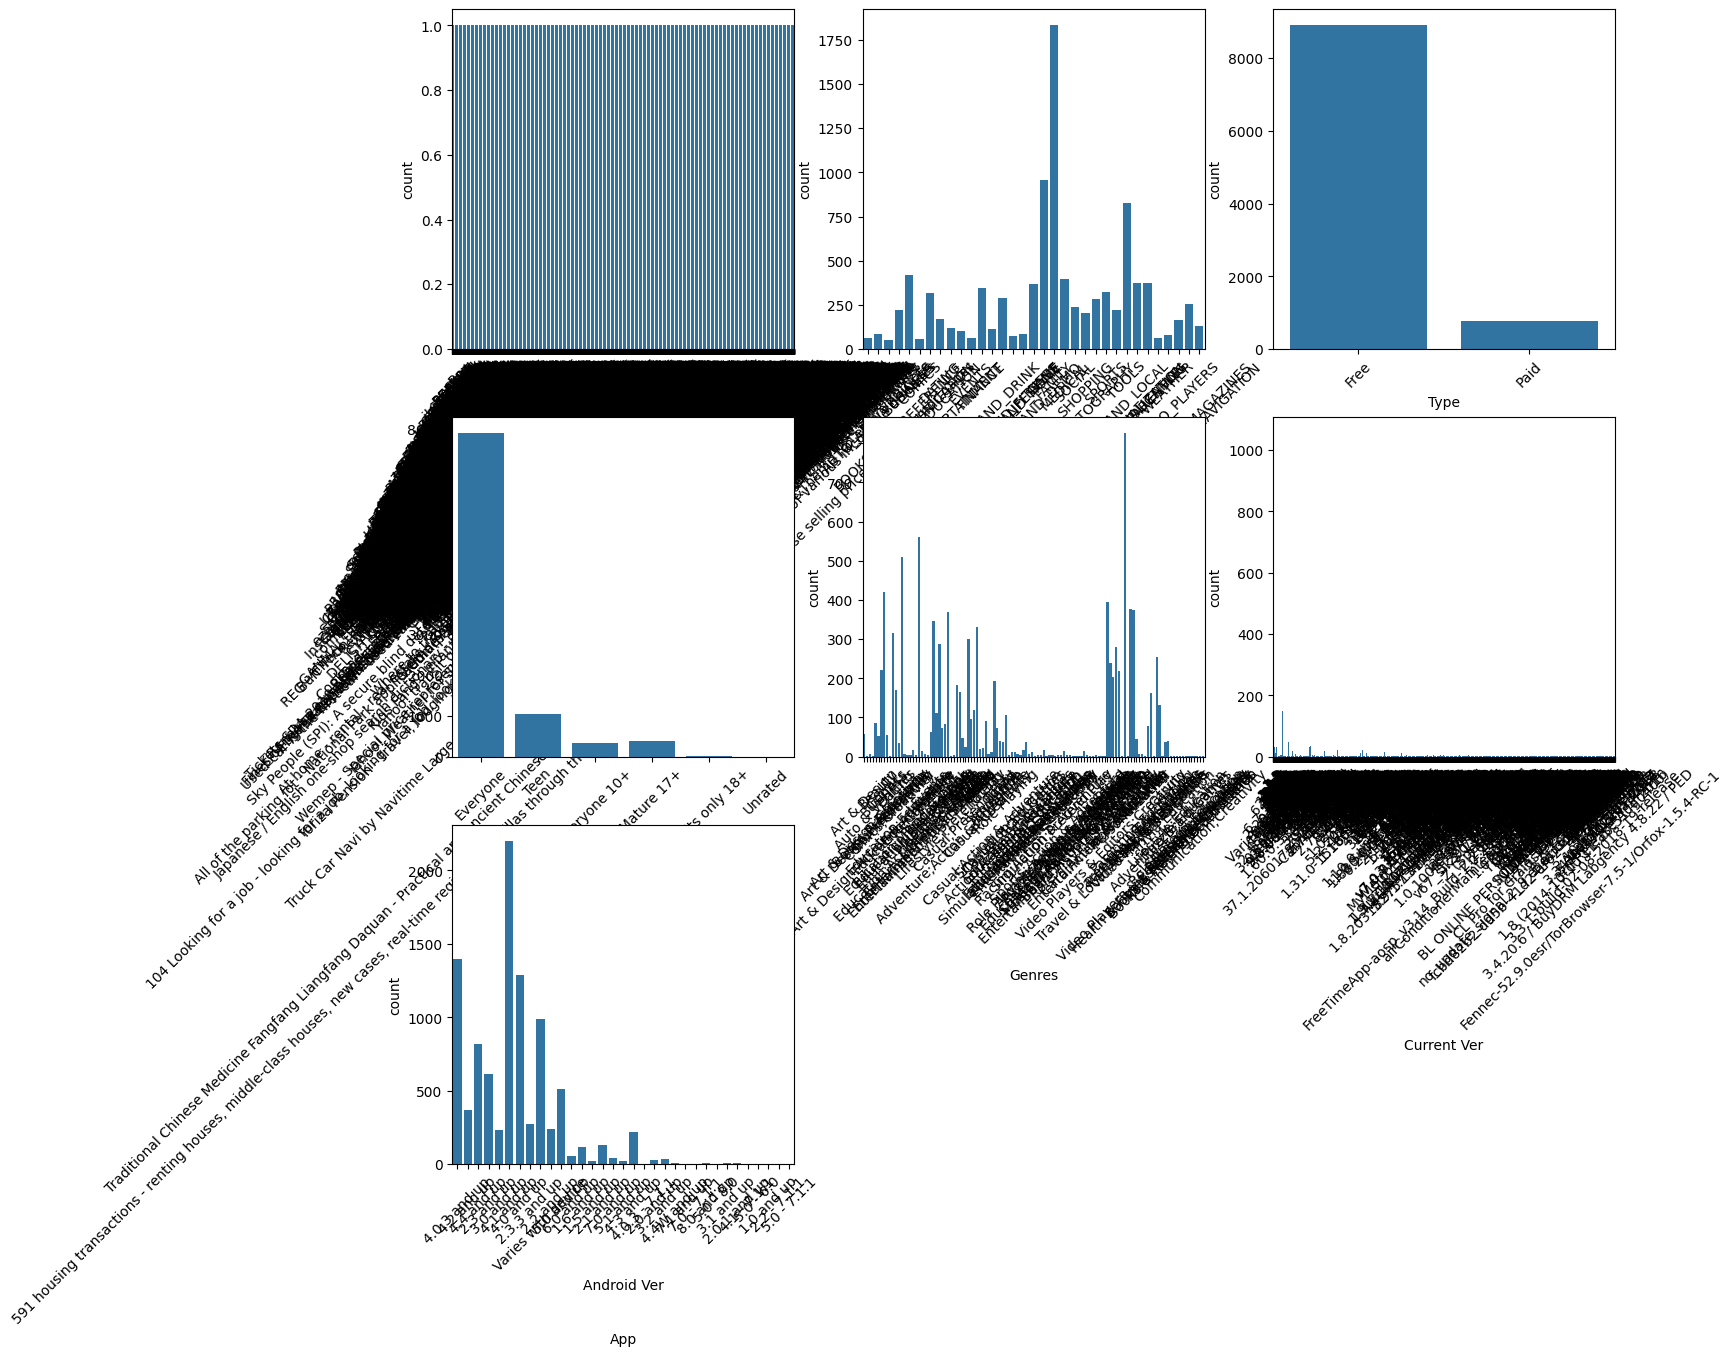

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 15))
for i, column in enumerate(categorical_features):
    plt.subplot(3, 3, i+1)
    sns.countplot(data=df_copy, x=column)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

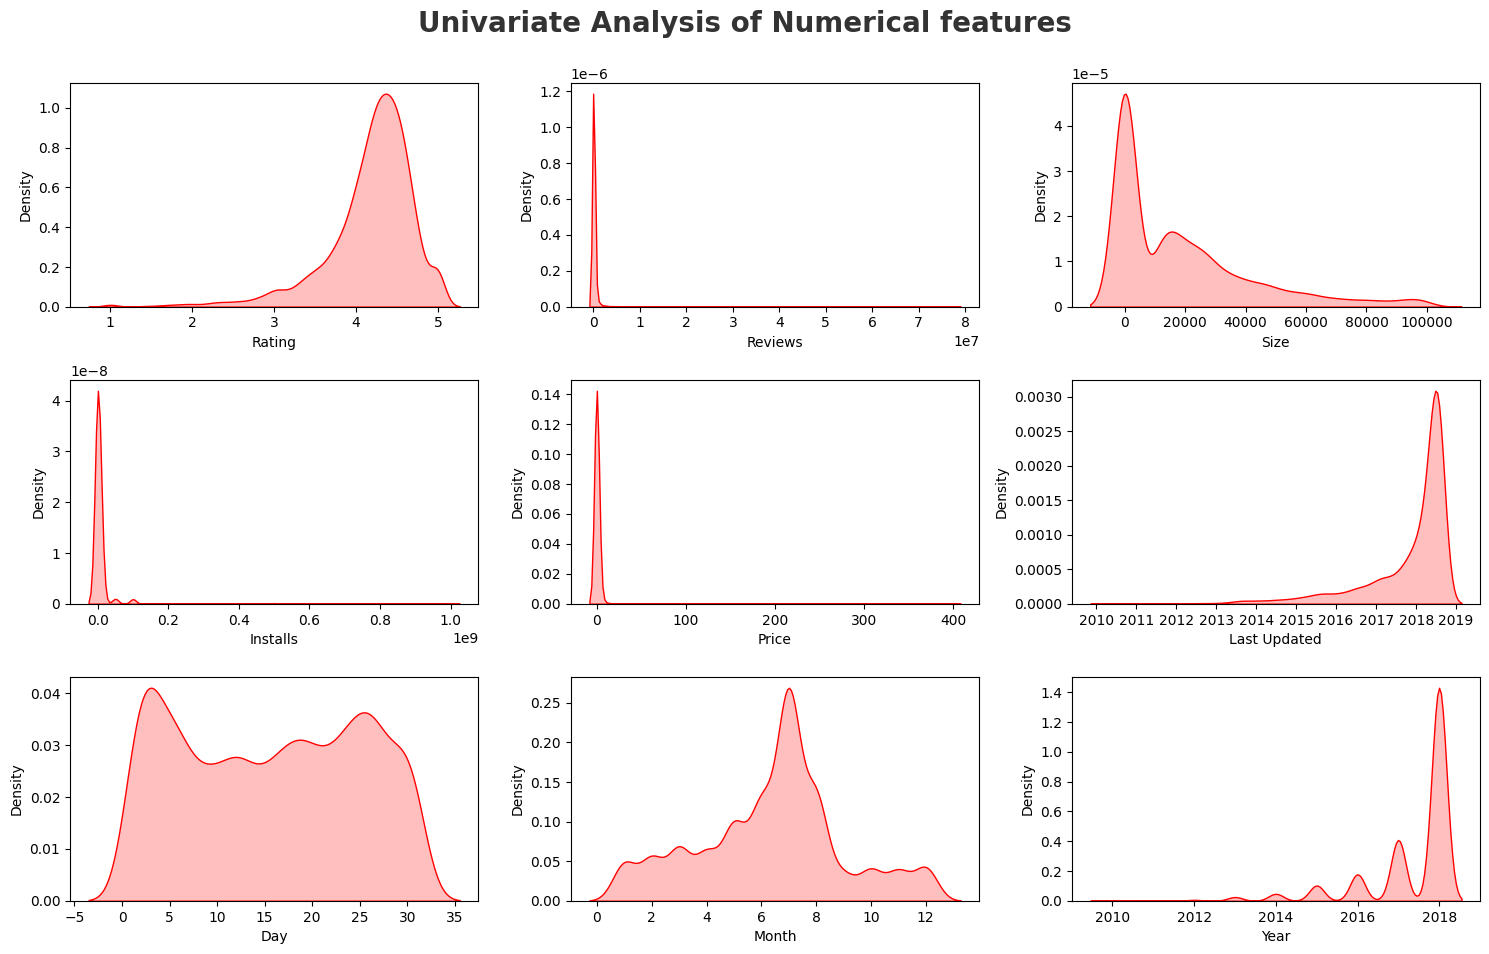

In [86]:
plt.figure(figsize=(15, 15))
plt.suptitle("Univariate Analysis of Numerical features", fontsize=20, fontweight="bold", alpha=0.8, y=1.)

for i in range(0, len(numerical_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df_copy[numerical_features[i]], shade=True, color='r')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()
plt.show()

- Rating and Year is left skewed while Reviews, Size, Installs and Price are right skewed

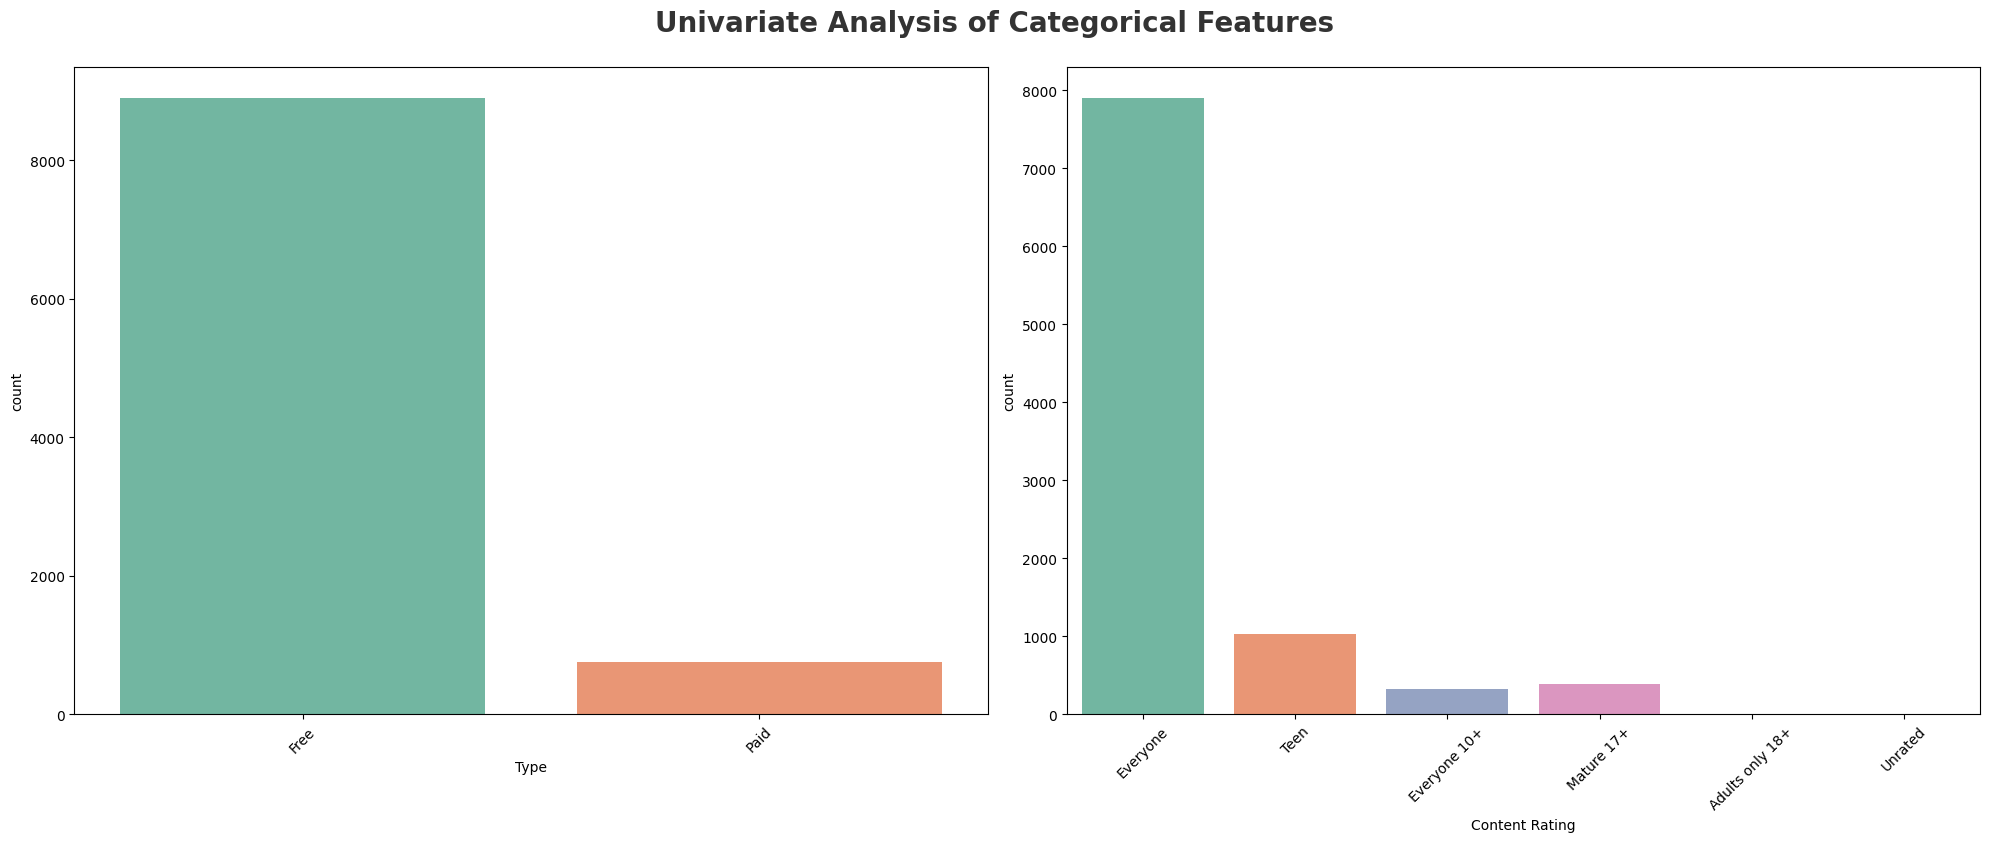

In [90]:
plt.figure(figsize=(20, 15))
plt.suptitle("Univariate Analysis of Categorical Features", fontsize=20, fontweight="bold", alpha=0.8, y=1.)
category = ['Type', 'Content Rating']
for i in range(0, len(category)):
  plt.subplot(2, 2, i+1)
  sns.countplot(x=df_copy[category[i]], palette="Set2")
  plt.xlabel(category[i])
  plt.xticks(rotation=45)
  plt.tight_layout()

### Which is the most popular app category ?

<Axes: ylabel='count'>

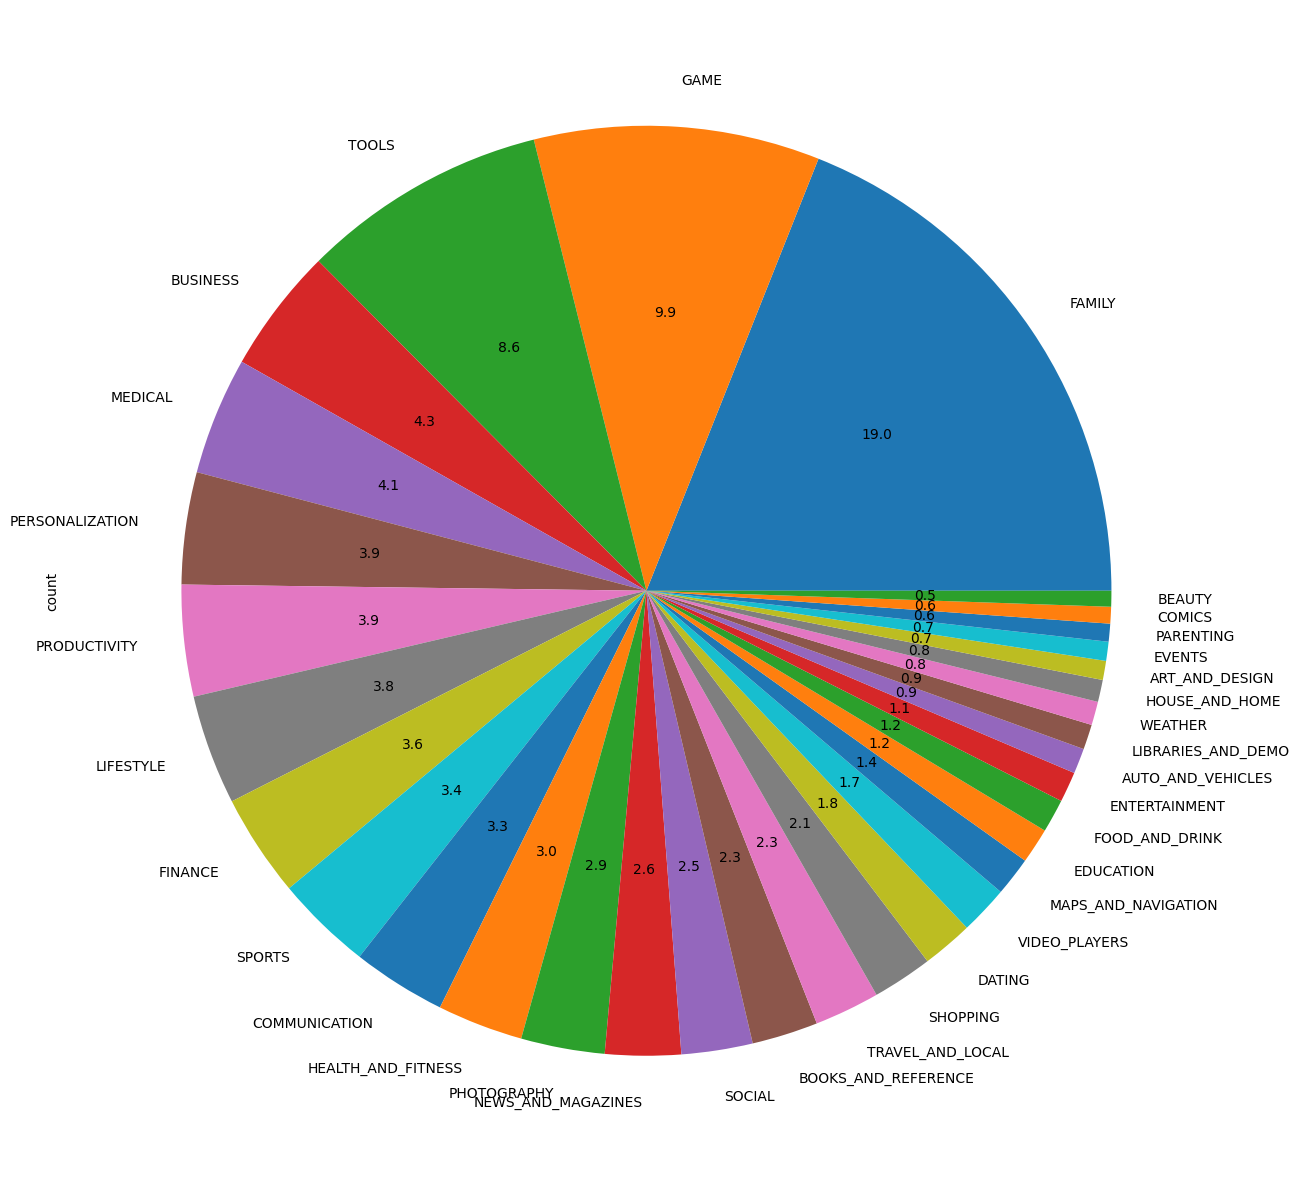

In [93]:
df_copy.Category.value_counts().plot.pie(y=df_copy.Category, figsize=(15, 16), autopct='%1.1f')

Ans: Family

### Top 10 App Categories ?

In [96]:
category = pd.DataFrame(df.Category.value_counts())
category.rename(columns={'Category': 'Count'}, inplace=True)

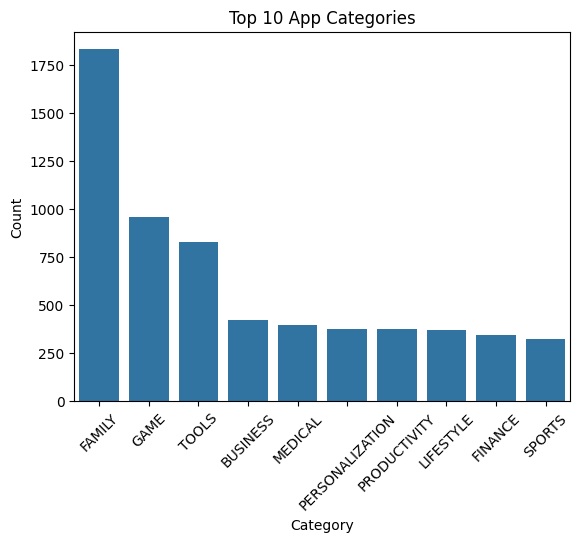

In [97]:
category_counts = df_copy['Category'].value_counts().head(10)
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.ylabel('Count')
plt.xlabel('Category')
plt.title('Top 10 App Categories')
plt.xticks(rotation=45)
plt.show()